# การใช้ K- mean แบ่งกลุ่มของ wine 

ข้อมูลที่เราใช้ เป็นข้อมูลที่บอกลักษณะของ wine ในกลุ่มต่างๆ ซึ่งเป็นข้อมูลที่มี Label ทั้งนี้ ที่เราใช้ข้อมูลที่เป็น Label เพราะเราต้องการจะดูว่า K- mean นั้นสามารถแบ่งกลุ่มข้อมูลได้ใกล้เคียงกับค่า yจริง มากน้อยแค่ไหน ซึ่งข้อมูลของเรานั้นก็มีหลาย feature แต่เราจะตัดออกเหลือ 2 features เพื่อให้ง่ายต่อการเข้าใจ

## 1. Preparing data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [106]:
df = pd.read_csv('https://github.com/Siriratkant/K-mean/raw/master/Wine.csv')

In [107]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [108]:
df.info() # เช็คดู missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [6]:
df.shape

(178, 14)

In [7]:
df.Customer_Segment.value_counts() # wine ถูกแบ่งออกเป็น 3 กลุ่ม

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [110]:
df2= df.drop(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',  'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],axis =1 )
df2.head() #เอาแค่ feature Total_Phenol and Flavanoids

,Total_Phenols,Flavanoids
0,2.80,3.06
1,2.65,2.76
2,2.80,3.24
3,3.85,3.49
4,2.80,2.69


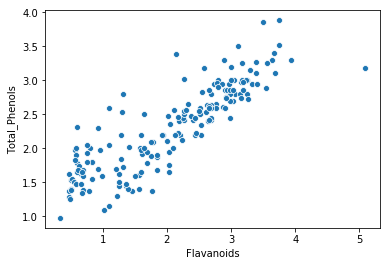

In [31]:
dt=sns.scatterplot(data=df2, x='Flavanoids', y='Total_Phenols') #plot กราฟดูกากรกะจายตัวของข้อมูล
dt    #dt.figure.savefig('Wine.png') >>คำสั่ง save รูป

## 2. การสุ่มจุดเริ่มต้นของ Cluster centroids

In [122]:
rx=np.random.uniform(1,7,2) #เลข 2 คือจำนวนกลุ่มที่เราต้องการแบ่ง (K=2)
rx

array([3.35568575, 1.9624844 ])

In [123]:
ry=np.random.uniform(0, 2.5,2) #เลข 2 คือจำนวนกลุ่มที่เราต้องการแบ่ง (K=2)
ry

array([0.43973649, 0.36144497])

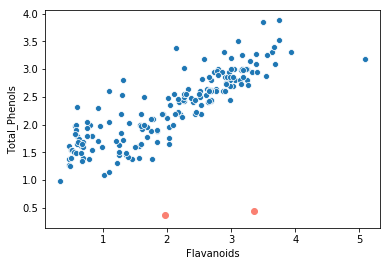

In [124]:
sns.scatterplot(data=df2,x='Flavanoids', y='Total_Phenols') #พล็อตกราฟแสดงการกระจายตัวของข้อมูล
plt.scatter(rx, ry, color='salmon', marker='o') #แสดงจุดที่เรา Random ลงไป

## 3. การประมาณการด้วย K - mean

In [52]:
from sklearn.cluster import KMeans

In [53]:
model=KMeans(n_clusters=2)#กำหนดกลุ่มที่แบ่ง K=2
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
X=df2[['Flavanoids', 'Total_Phenols']] #กำหนด feature ที่จะใช้
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
model.cluster_centers_ # จุด Cluster centroids

array([[2.85032258, 2.7872043 ],
       [1.13094118, 1.75670588]])

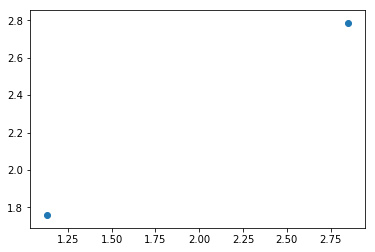

In [66]:
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1])

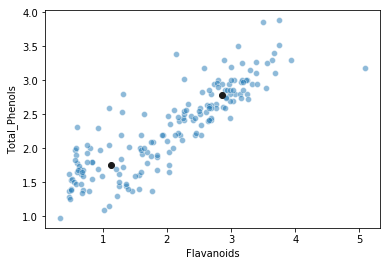

In [67]:
sns.scatterplot (data=df2, x='Flavanoids', y='Total_Phenols',hue = None, alpha=.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='o')

In [68]:
model.labels_ #กำนหนด label ให้กับกลุ่มข้อมูลของเรา

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [69]:
df2['cluster']=model.labels_ #สร้างคอลัมน์ใหม่ชื่อ cluster เพื่อที่จะนำไปเปรียบเทียบกับกลุ่มข้อมูลเรา
df2.head() 

,Total_Phenols,Flavanoids,cluster
0,2.80,3.06,0
1,2.65,2.76,0
2,2.80,3.24,0
3,3.85,3.49,0
4,2.80,2.69,0


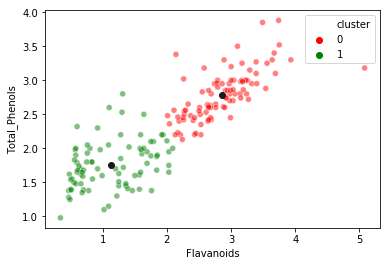

In [70]:
dg = sns.scatterplot(data=df2, x='Flavanoids', y='Total_Phenols', hue='cluster', alpha=.5, palette=['red', 'green']) #พล็อตกราฟดูการแบ่งกลุ่มข้อมูล
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='o')

In [22]:
#dg.figure.savefig('Wines.png') คำสั่ง save รูป

## 4. เลือก K ที่ดีที่สุด

[[1, 245.92525280898877]]


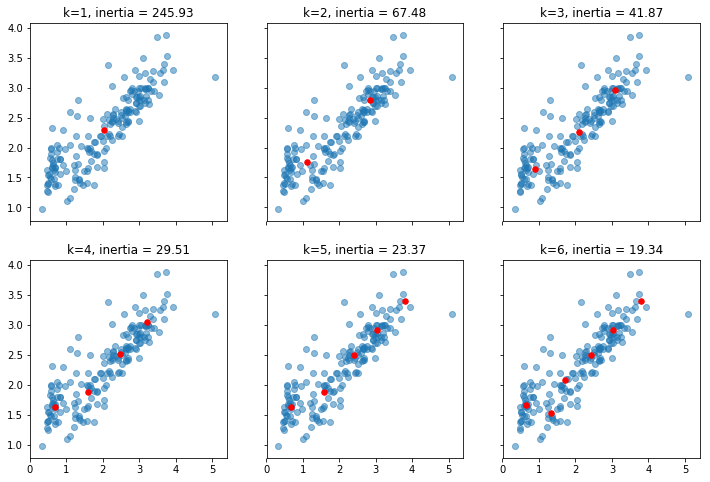

In [93]:
fig, ax = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True) #พล็อตกราฟดูว่า k เพิ่มขึ้น ค่า cost function หรือ inertia  ลดลงเท่าไร
k=1
cost=[] 
ax=ax.ravel()
# ax.shape[0]
for i in range(ax.shape[0]):
        m=KMeans(n_clusters=k)
        m.fit(X)
        cost.append([k, m.inertia_])
        ax[i].scatter(data=df2, x='Flavanoids', y='Total_Phenols', alpha=.5)
        ax[i].scatter(m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color='r', marker='o', s=30)
        ax[i].set_title(f'k={k}, inertia = {m.inertia_:,.2f}')
        k += 1
print(ssd)

In [95]:
dd =np.array(cost) #คำสั่งดูระยะทางรวมของแต่ละจุดของ K โดยคอลัมน์แรกคือ จำนวน K และ คอลัมน์ที่ 2 คือระยะห่าง
print(xy)

[[  1.         245.92525281]
 [  2.          67.47656579]
 [  3.          41.86847085]
 [  4.          29.50781423]
 [  5.          23.36608403]
 [  6.          19.34333091]]


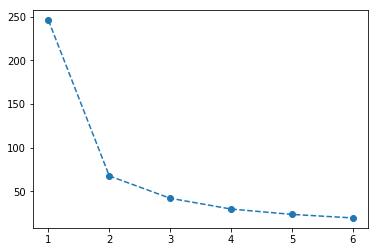

In [125]:
plt.plot(dd[:,0],xy[:,1],linestyle='--', marker='o') #plot Elbow graph

จากรูปจะเห็นได้ว่าจำนวน K ที่น่าจะเหมาะสมน่าจะเป็น K =3 ทั้งนี้จากรูปจะเห็นได้ว่า ถ้าเราเลือก k = 4 ค่า cost function ของเราก็ลดลงไม่มาก 